In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping

# Loading mnist dataset

In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("Shapes: ")
print("==============================")
print(f"{xtrain.shape}")
print(f"{xtest.shape}")
print(f"{ytrain.shape}")
print(f"{ytest.shape}")

Shapes: 
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# Preprocessing

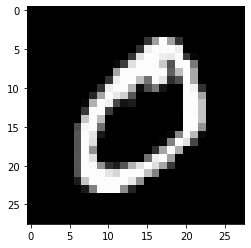

In [4]:
plt.imshow(xtrain[1],cmap="gist_gray")

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_cat_train=to_categorical(ytrain,num_classes=10)

In [7]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [8]:
y_cat_test=to_categorical(ytest,num_classes=10)

In [9]:
xtrain[0].max()

255

In [10]:
xtrain[0].min()

0

In [11]:
xtrain=xtrain/255

In [12]:
xtest=xtest/255

In [13]:
print(xtrain[0].max())
print(xtest[0].max())

1.0
1.0


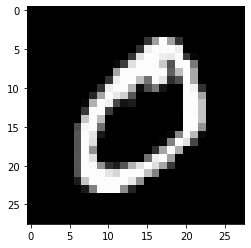

In [14]:
plt.imshow(xtrain[1],cmap="gist_gray")

In [15]:
xtrain=xtrain.reshape(-1, 28, 28, 1)
xtest=xtest.reshape(-1, 28, 28, 1)

# Model

In [16]:
es=EarlyStopping(patience=2)

In [17]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64,"relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(xtrain,y_cat_train,epochs=20,validation_data=(xtest,y_cat_test),callbacks=[es])

Epoch 1/20
1875/1875 [==============================] - 24s 6ms/step - loss: 0.1710 - accuracy: 0.9478 - val_loss: 0.0658 - val_accuracy: 0.9788
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0537 - accuracy: 0.9836 - val_loss: 0.0401 - val_accuracy: 0.9868
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0306 - val_accuracy: 0.9900
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0369 - val_accuracy: 0.9885
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.0305 - val_accuracy: 0.9914
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.0395 - val_accuracy: 0.9871
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0161 - accuracy: 0.9950 - val_loss: 0.0387 - val_acc

# Evaluation

In [18]:
results=pd.DataFrame(model.history.history)

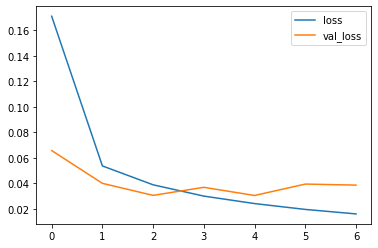

In [19]:
results[["loss","val_loss"]].plot()

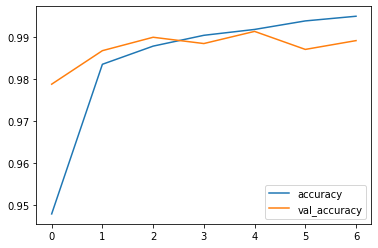

In [20]:
results[["accuracy","val_accuracy"]].plot()

In [21]:
prediction=np.argmax(model.predict(xtest), axis=-1)

In [22]:
metrics.confusion_matrix(prediction,ytest)

array([[ 975,    0,    0,    0,    0,    2,    3,    0,    2,    0],
       [   0, 1132,    1,    1,    0,    0,    1,    4,    0,    0],
       [   0,    0, 1022,    1,    0,    0,    0,    5,    1,    0],
       [   0,    1,    0,  999,    0,    5,    0,    1,    0,    0],
       [   1,    0,    1,    0,  976,    0,    3,    1,    0,    9],
       [   0,    0,    0,    2,    0,  868,    0,    0,    0,    1],
       [   2,    0,    0,    0,    2,    9,  948,    0,    0,    0],
       [   1,    0,    2,    0,    0,    1,    0, 1008,    0,    2],
       [   1,    2,    6,    7,    0,    4,    3,    2,  969,    2],
       [   0,    0,    0,    0,    4,    3,    0,    7,    2,  995]])

In [23]:
print(metrics.classification_report(prediction,ytest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       982
           1       1.00      0.99      1.00      1139
           2       0.99      0.99      0.99      1029
           3       0.99      0.99      0.99      1006
           4       0.99      0.98      0.99       991
           5       0.97      1.00      0.98       871
           6       0.99      0.99      0.99       961
           7       0.98      0.99      0.99      1014
           8       0.99      0.97      0.98       996
           9       0.99      0.98      0.99      1011

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

